 # VISUALIZACIÓN
 

## IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re

In [2]:
!pwd

/Users/jaimecabanyes/Desktop/IRON_HACK/Trabajos IH/W3


In [3]:
ascensos_final = pd.read_csv("Data/ascensos_everest_final.csv")

## PEQUEÑOS DATAFRAMES DEL DATAFRAME ORIGINAL

In [4]:
df_citizenship_común = ascensos_final[ascensos_final['Citizenship'].map(ascensos_final['Citizenship'].value_counts()) > 100]
#Dataframe de las nacionalidades mas frequentes

In [5]:
df_no_may = ascensos_final[ascensos_final["Month"] != "May"]
#Dataframe excluyendo Mayo

In [6]:
df_no_oxígeno = ascensos_final[ascensos_final["Oxy"] != "Yes"]
#Dataframe excluyendo el uso de oxígeno

In [18]:
df_Time_común = ascensos_final[ascensos_final['Time'].map(ascensos_final['Time'].value_counts()) > 100]

## DISPLAY DE LOS  GRÀFICOS

In [7]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (14.,8.)})
sns.set_style("whitegrid")

## DISTRIBUCIONES 

In [8]:
ascensos_final.head(1)

,Unnamed: 0,Peak,Name,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Season,Month,Day,Time
0,0,EVER,Tenzing Norgay,India,M,39.0,Yes,No,Nepal,1953,Spr,May,29,11:30


### DISTRIBUCIÓN DE ALPINISTAS POR EDAD

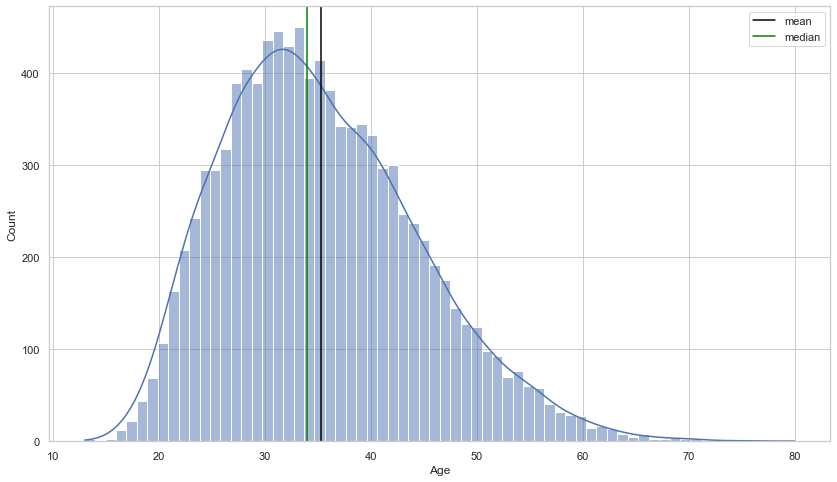

In [9]:
graf = sns.histplot(x=ascensos_final.Age, kde=True, bins = 68)
graf.axvline(x=ascensos_final.Age.dropna().mean(), c="black", label="mean")
graf.axvline(x=ascensos_final.Age.dropna().median(), c="green", label="median")
plt.legend()

### USO DE OXÍGENO

In [10]:
Datos = ascensos_final["Oxy"].value_counts()

<AxesSubplot:ylabel='Oxy'>

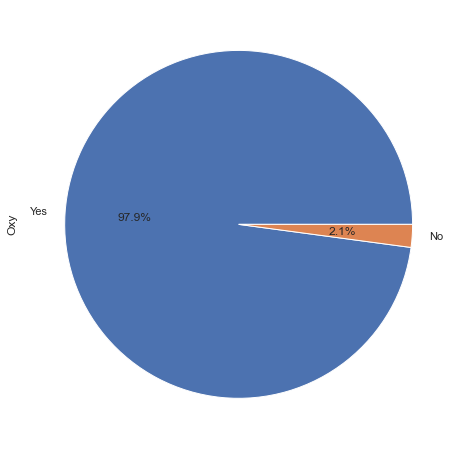

In [11]:
Datos.plot.pie(autopct="%.1f%%")


<AxesSubplot:xlabel='Year', ylabel='Count'>

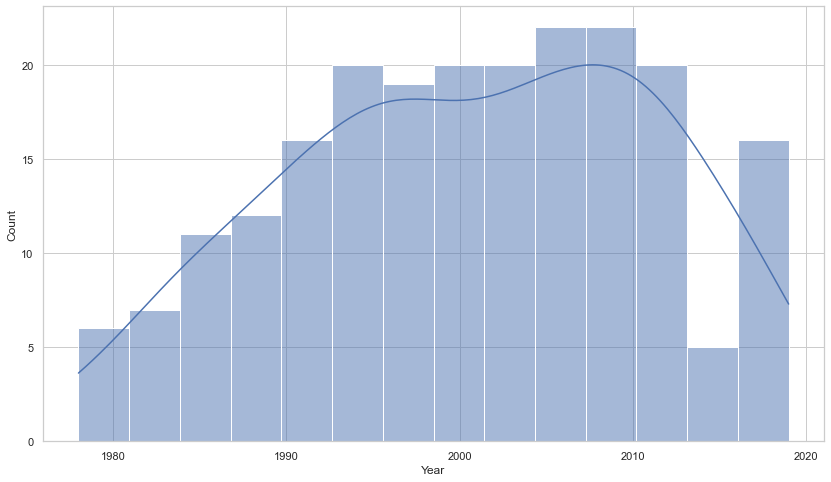

In [12]:
sns.histplot(data=df_no_oxígeno, x="Year", bins=14, kde=True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

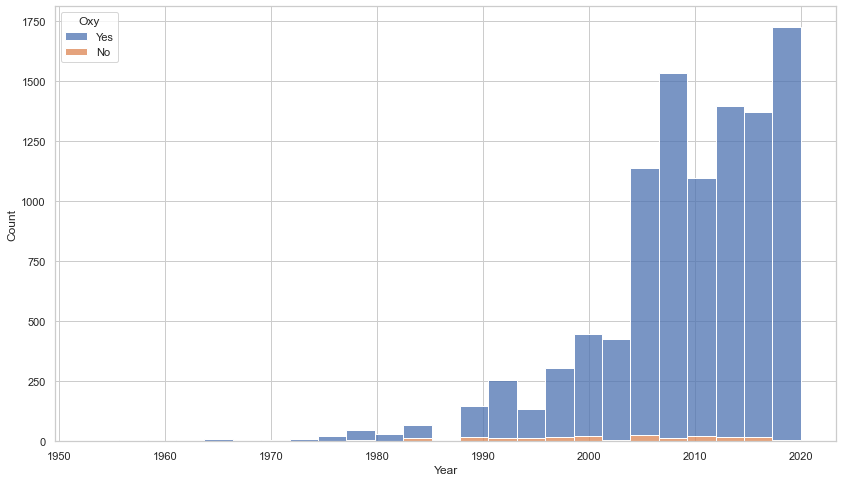

In [13]:
sns.histplot(data=ascensos_final, x="Year", hue="Oxy", multiple="stack", bins=25)

### COMPARACIÓN EDAD CON MUERTE/GÉNERO

<AxesSubplot:xlabel='Sex', ylabel='Age'>

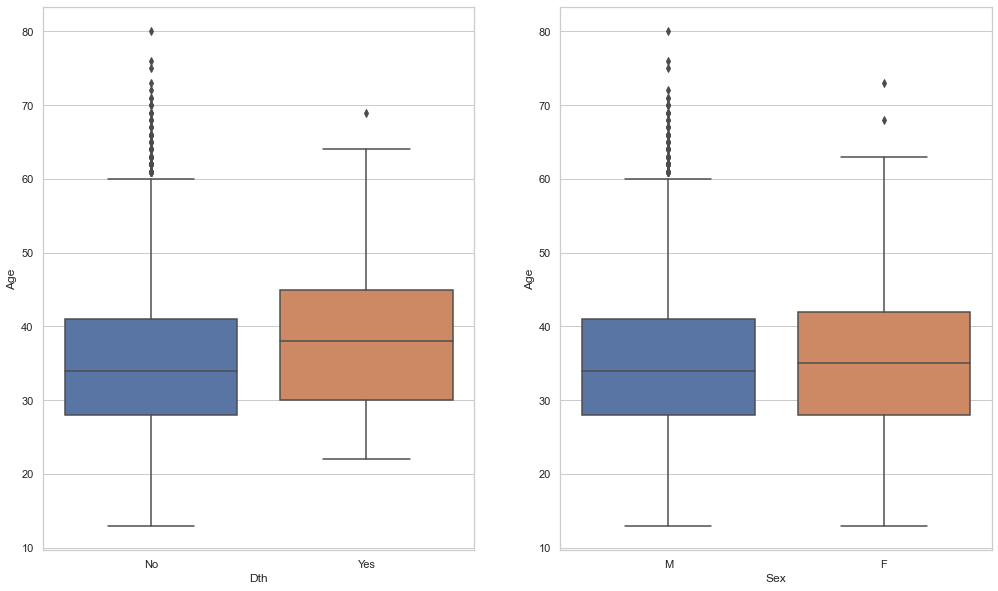

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,10))
sns.boxplot(x="Dth", y="Age", data=ascensos_final, ax=ax[0])
sns.boxplot(x="Sex", y="Age", data=ascensos_final, ax=ax[1])

### DDISTRIBUCIÓN POR MES

In [15]:
Datos1 = ascensos_final["Month"].value_counts()

In [16]:
Datos1

May    9673
Oct     241
Jun     152
Apr      48
Sep      46
Dec      13
Aug       9
Feb       2
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

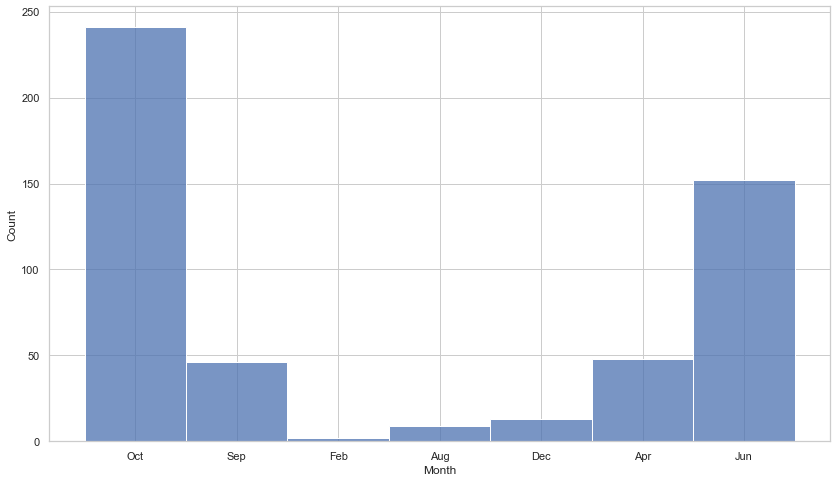

In [17]:
sns.histplot(x=df_no_may.Month)